In [19]:
import cv2
import matplotlib.pyplot as plt

In [20]:
im = cv2.imread('elephant.webp') # its read an image as into BGR and matplot show in RBG
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
print(im.shape)

(340, 604, 3)


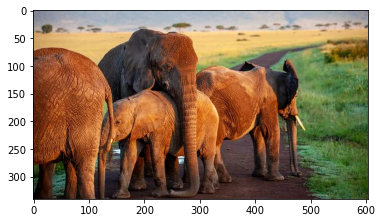

In [21]:
plt.imshow(im)
plt.show()

In [22]:
#Flatten each channels of the image
all_pixels = im.reshape((340*604,3))
print(all_pixels.shape)

(205360, 3)


In [23]:
from sklearn.cluster import KMeans

In [24]:
dominant_color = 4
km = KMeans(n_clusters=dominant_color)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
centers = km.cluster_centers_

In [26]:
import numpy as np
centers = np.array(centers,dtype="uint8")

In [27]:
centers

array([[ 58,  39,  26],
       [ 95, 110,  74],
       [206, 183, 149],
       [173,  94,  46]], dtype=uint8)

### Plot all these colors

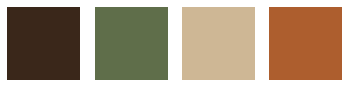

In [28]:
i=1

plt.figure(0,figsize=(6,4))
colors=[]
for each_color in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_color)
    #color Swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_color
    plt.imshow(a)
    
plt.show()

# Segmenting the Original Image

In [29]:
new_img = np.zeros((340*604,3),dtype='uint8')
print(new_img.shape)

(205360, 3)


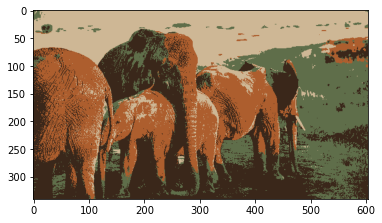

In [30]:
for ix in range(new_img.shape[0]):
    new_img[ix]=colors[km.labels_[ix]]
    
new_img=new_img.reshape((340,604,3))
plt.imshow(new_img)
plt.show()

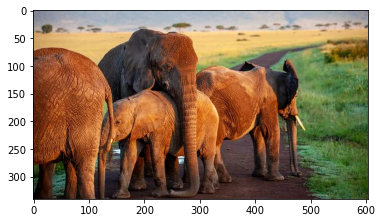

In [31]:
plt.imshow(im)
plt.show()